<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars/sem_6/student_teacher_dist.png" height="300" width="600"> 

# <center> R для тервера и матстата. <br>  <br> Домашка номер шесть! </center>

Данный ноутбук является домашкой по курсу «R для теории вероятностей и математической статистики» (РАНХиГС, 2017-2018). Автор ноутбука [вот этот парень по имени Филипп.](https://vk.com/ppilif) Если у вас для него есть деньги, слава или женщины, он от этого всего не откажется. Ноутбук распространяется на условиях лицензии [Creative Commons Attribution-Share Alike 4.0.](https://creativecommons.org/licenses/by-sa/4.0/) При использовании обязательно упоминание автора курса и аффилиации. При наличии технической возможности необходимо также указать активную гиперссылку на [страницу курса.](https://fulyankin.github.io/R_probability/) На ней можно найти другие материалы. Фрагменты кода, включенные в этот notebook, публикуются как [общественное достояние.](https://creativecommons.org/publicdomain/zero/1.0/)

----------------------

Приветствую вас внутри шестой домашки. __Краткий брифинг:__

* Вас ждёт проверка нескольких гипотез, часть связана с долями, часть со средними, часть с дисперсиями.
* Несколько задач большие, несколько малые.
* При решении каждой задачи чётко обосновываейте выбор критерия и проверяйте все необходимые для его работы предпосылки. 
* Попробуйте вбивать все критерии вручную, я бы на вашем месте попробовал бы писать полноценные функции для проверки гипотез. Например, вот так вот будет выглядеть функция для проверки гипотезы о доли. 

In [24]:
z.prop = function(m, n, p0, alpha=0.05, alternative="two-sided"){
  
  p_hat = m/n                       # оценка вероятности 
  sd_p = sqrt(p_hat*(1-p_hat)/n)    # дисперсия оценки
  z_stat = (p_hat - p0)/sd_p       # наблюдаемое значение

  # В зависимости от типа альтернативы делаем расчёты
  if(alternative == 'two-sided'){
      p_val <- 2*pnorm(-abs(z_stat))
      z_crit <- qnorm(1-alpha/2)
  }
  if(alternative == 'lower'){
      p_val <- pnorm(-abs(z_stat))
      z_crit <- qnorm(alpha)
  }
  if(alternative == 'greater'){
      p_val <- 1 - pnorm(abs(z_stat))
      z_crit <- qnorm(1-alpha/2)
  }
    
  # Чтобы на экран выводилась основная информация (если нужно)
  cat('estimate: ', p_hat, '\n')
  cat('z_crit: ', z_crit, '\n')
  cat('z-stat: ', z_stat, '\n')
  cat('p-value: ', p_val, '\n')
  cat('alternative: ', alternative)
 
  # Возвращаем результаты проверки гипотезы в виде списка
  return( list(estimate = p_hat, 
               z_crit = z_crit,
               z_stat = z_stat,
               p_val = p_val,
               alternative = alternative))
}

result <- z.prop(52, 100, 0.5, alpha=0.01, alternative = 'greater')

result$p_val # можно по именам из листа доставать разные циферки :3

estimate:  0.52 
z_crit:  2.575829 
z-stat:  0.4003204 
p-value:  0.3444603 
alternative:  greater

[1] 0.3444603

Если кишка тонка писать свои функции, пользуйтесь готовыми. Но имейте в виду, что не все критерии, которые понадобятся вам в этой тетрадке, реализованы в R в виде одной команды. Если есть желание, можете снабдить выдачу картиночками как в лекции. Но только сделайте это покомпактнее. Также не путайте картинки местами! Например, не вздумайте использовать картинку для нормального распределения для t-критерия! Если код в ggplot кажется вам тяжёлым, можете попробовать рисовать картинки [как во втором ответе тут.](https://stackoverflow.com/questions/36508020/can-r-visualize-the-t-test-or-other-hypothesis-test-results) Только сделайте её покрасивше :3  

## Задачка 1


В одном из выпусков программы "Разрушители легенд" проверялось, действительно ли заразительна зевота. В эксперименте участвовало $50$ испытуемых, проходивших собеседование на программу. Каждый из них разговаривал с рекрутером; в конце $34$ из $50$ бесед рекрутер зевал. Затем испытуемых просили подождать решения рекрутера в соседней пустой комнате.

Во время ожидания $10$ из $34$ испытуемых экспериментальной группы и $4$ из $16$ испытуемых контрольной начали зевать. Таким образом, разница в доле зевающих людей в этих двух группах составила примерно $4.4\%$. Ведущие заключили, что миф о заразительности зевоты подтверждён.

Можно ли утверждать, что доли зевающих в контрольной и экспериментальной группах отличаются статистически значимо? Посчитайте достигаемый уровень значимости ($p-$значение) при альтернативе заразительности зевоты.

In [ ]:
# Ваш код

## Задачка 2 

Ежегодно более $200000$ людей по всему миру сдают стандартизированный экзамен GMAT при поступлении на программы MBA. Средний результат составляет $525$ баллов, стандартное отклонение — $100$ баллов.

Сто студентов закончили специальные подготовительные курсы и сдали экзамен. Средний полученный ими балл — $541.4$. Проверьте гипотезу о неэффективности программы против односторонней альтернативы о том, что программа работает. Отвергается ли на уровне значимости $0.05$ нулевая гипотеза? 

In [ ]:
# Ваш код

Оцените теперь эффективность подготовительных курсов, средний балл $100$ выпускников которых равен $541.5$. Отвергается ли на уровне значимости $0.05$ та же самая нулевая гипотеза против той же самой альтернативы? Не забудьте в обоих случаях найти p-значения.

In [ ]:
# Ваш код

## Задачка 3

Во время ЧЕ по футболу 2008 года и ЧМ 2010 года [Осьминог Пауль](https://ru.wikipedia.org/wiki/Пауль_(осьминог) занимался прогнозированием побед (после он ушёл в финансовую аналитику и IB). Осьминог дал верные прогнозы в $12$ случаях из $14$. Если предположить, что Пауль выбирает победителя наугад, какова вероятность получить 12 верных прогнозов из 14? 

In [ ]:
# Ваш код 

Можно ли утверждать, что Осьминог обладает даром предвидения? Каким получилось p-значение? 

In [ ]:
# Ваш код

## Задачка 4

[В табличке](https://yadi.sk/i/bsjOHeOO3XaTN9) `gear.csv` лежат данные о производстве шестерёнок на станке. Первая колонка это диаметр, произведённой шестерни. Вторая колонка это то, к какой серии относится шестерня. 

Ясное дело, что станок не всегда делает диаметр равным $1$. У него есть некоторая погрешность. Будем считать, что станок годный, если дисперсия диаметра выпускаемых им шестерёнок не превышает $0.01$. Правда ли, что станок годный?

In [81]:
df = read.csv('/Users/fulyankin/Yandex.Disk.localized/R/R_prob_data/gear.csv', sep=',')
head(df)

DIAMETER,BATCH
1.006,1
0.996,1
0.998,1
1.000,1
0.992,1
0.993,1


In [ ]:
# Ваш код

Правда ли, что все десять батчей станок производил с одинаковой погрешностью и не сбивался? 

In [ ]:
# Ваш код

## Задачка 5

[В табличке](https://yadi.sk/i/_gkQpGru3XabcR) `auto.csv` находятся данные о расходе топлива машинами в галонах на одну милю в США и Японии. Можно ли утверждать, что у Японских двигателей вариация топлива, необходимого для проезда одной мили, меньше чем в США? 

In [ ]:
# Ваш код

## Задачка 6

Новый корм для котиков рекламируется с помощью ркламного банера. Отдел маркетинга разработал для рекламы новый банер. Они считают, что он более красивый. Перед фирмой возникла необходимость првоерить какой из двух баннеров лучше. 

Для этого была создана специальная веб-форма. В этой веб-форме людям по очереди демонстрировали оба банера и просили поставить лайк, если банер нравится человеку. Если человеку нравятся оба банера, он может поставить два лайка. Если ему не нравится ни один банер, он может не ставить лайки вовсе. Собранные в конечном итоге данные находятся в [табличке.](https://yadi.sk/i/9Z5N-6PM3XN8on)

Можно ли утверждать, что оба банера одинаково хороши? Не забудьте найти p-значение.

In [12]:
df = read.csv('/Users/fulyankin/Yandex.Disk.localized/R/R_prob_data/banner_click_stat.csv', sep='\t', header = FALSE)
names(df) = c('banner_a', 'banner_b')
head(df)

banner_a,banner_b
0,0
1,1
0,0
0,0
0,0
0,0


In [ ]:
# Ваш код 

## Задачка 7

> Помните, что для человека звук его имени является самым сладким и самым важным звуком человеческой речи. (Дейл Карнеги)


Доверяй, но проверяй. Решим задачку по психологии! Все цитаты в пабликах вконтакте делятся на два вида: мудрые и недостаточно мудрые. Если цитата мудрая, то её не грех репостнуть на стеночку. Поговаривают, что если в цитате есть личные местоимения, то пользователь автоматически сопоставляет себя автору этой цитаты и вероятность того, что она буде репостнута повышается. Например, цитату 

> Можно простить человеку все, кроме отсутствия. (Экзюпери) 

мне не очень хотелось бы репостить. А вот цитата 

> Мне наплевать, что вы обо мне думаете. Я о вас вообще не думаю. (Булгаков) 

совершенно другое дело. 

Гипотеза сформулирована. Глаза загорелись. Пришло время проверить её. В [табличке df_vk_wise](https://yadi.sk/i/Dx5hDwkW3XN2Ni) лежат даныне о мудрых цитатах из [мудрого паблика.](https://vk.com/ooioioioioioo) В колонке I находится переменная, которая принимает значение `True`, когда в тексте цитаты было личное местоимение "Я".

Срежем первые $50$ постов, так как под ними количество репостов и лайков ещё окончательно не выставлено и будем работать с остатками. 

In [4]:
df = read.csv('/Users/fulyankin/Yandex.Disk.localized/R/R_prob_data/df_vk_wise.csv', sep='\t')
df = df[51:nrow(df),]
head(df)

,X,likes,reposts,text,I
50,49,902,40,"Забудешь в кафе зонтик, вернешься - и жизнь примет другой оборот. Михаил Шишкин. ""Письмовник""",False
51,50,549,25,"Я, говорит, люблю человечество, но дивлюсь на себя самого: чем больше я люблю человечество вообще, тем меньше я люблю людей в частности. Достоевский. Братья Карамазовы",True
52,51,607,22,"Нельзя любить то, что я люблю, да ещё так, как я люблю, и вдобавок жить среди людей. Хулио Кортасар. ""Игра в классики""",True
53,52,914,37,"Если испытываешь по-настоящему глубокое чувство, не стыдись его проявлять. Джон Фаулз. ""Коллекционер""",False
54,53,989,34,"— Я тебя люблю, — сказал я. — Это пройдет, — ответила она и положила трубку. Юрий Визбор",True
55,54,1229,32,"Он очаровательно рассказывает мне о том, как он меня не любит. Марина Цветаева",False


Проверьте гипотезу о равенстве среднего числа репостов под постами с местоимением "Я" и постами без него. Чётко обоснуйте выбор критерия для этих целей. 

In [ ]:
# Ваш код

Предположим, что число репостов имеет распределение Пуассона с интенсивностью $\lambda$. Проверьте с помощью критерия отношения правдоподобия гипотезу о том, что $\lambda = 100$. 

In [ ]:
# Ваш код

Проверьте ту же гипотезу, используя критерий о равенстве средних. Различаются ли результаты? Как думаете, почему?

In [ ]:
# Ваш код

Проверьте гипотезу о том, что интенсивность репостов под постами с лайками совпадает с интенсивностью под постами без лайков. Используйте для этого критерий отношения правдоподобий. 

In [ ]:
# Ваш код

Если вы помните, у распределение Пуассона $E(X) = Var(X) = \lambda$. Это довольно сильное предположение. Каждый раз, когда мы моделируем какой-то процесс с помощью этого распределения, мы неявно предполагаем наличие такого ограничения. Как бы вы протестировали его наличие для наших данных? Опишите алгоритм и реализуйте его. 

In [ ]:
# Ваш код

## Задачка 8

[В датасете]( ) `marijuana-street-price.csv` лежат данные о спросе на марихуанну в США. 

In [51]:
df = read.csv('/Users/fulyankin/Yandex.Disk.localized/R/R_prob_data/marijuana-street-price.csv', sep=',')
head(df)

State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date
Alabama,339.06,1042,198.64,933,149.49,123,2014-01-01
Alaska,288.75,252,260.60,297,388.58,26,2014-01-01
Arizona,303.31,1941,209.35,1625,189.45,222,2014-01-01
Arkansas,361.85,576,185.62,544,125.87,112,2014-01-01
California,248.78,12096,193.56,12812,192.92,778,2014-01-01
Colorado,236.31,2161,195.29,1728,213.50,128,2014-01-01


Правда ли, что спрос на траву высокого качества `HighQN` 30 января 2015 года был выше, чем спрос 1 января 2015 года? А правда ли, что он 1 января 2015 года выше, чем 1 января 2014 года? Какое количество наблюдений используется для проверки данной гипотезы? Обоснуйте выбор критерия. 

In [ ]:
# Ваш код

Правда ли, что средняя стоимость травы высокого, среднего и низкого качества в 2015 году совпадает? Обоснуйте выбор критерия, проследите за тем, чтобы уровень значимости не вышел из-под контроля с помощью поправки Бонферонни.

In [ ]:
# Ваш код

Проверьте ту же гипотезу, но используя метод Холма для корекции. 

In [ ]:
# Ваш код

## Задачка 9

Есть ли связь между неграмотностью и рождаемостью? Для $94$ стран, уровень неграмотности женщин в которых больше $5\%$, известны доля неграмотных среди женщин старше $15$ (на $2003$ год) и средняя рождаемость на одну женщину (на $2005$ год). Эти данные лежат [в табличке](https://yadi.sk/i/ae_5JCcZ3Xahbz) `illiteracy.txt`.

In [95]:
df = read.csv('/Users/fulyankin/Yandex.Disk.localized/R/R_prob_data/illiteracy.csv', sep='\t')
head(df)

Country,Illit,Births
Albania,20.5,1.78
Algeria,39.1,2.44
Bahrain,15.0,2.34
Belize,5.9,2.97
Benin,73.5,5.60
Bolivia,18.5,3.65


Построим для этих двух признаков облако рассеивания. 

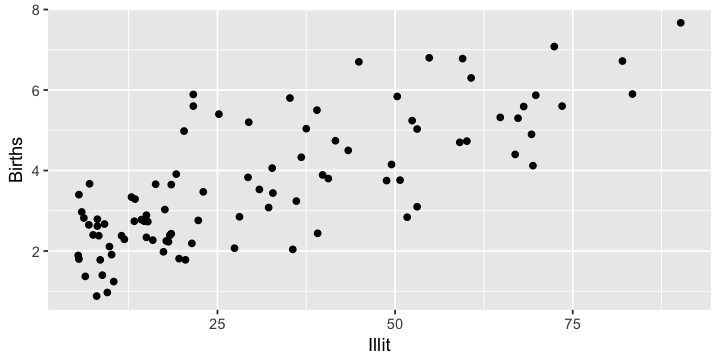

In [107]:
qplot(Illit, Births, data=df)

Судя по всему, между переменными есть линейная связь. При росте Illit увеличивается Births. Давайте попробуем посмотреть на величину этой линейной связи. Чему равен выборочный коэффициент корреляции Пирсона между этими двумя признаками?

In [ ]:
# Ваш код 

Давайте проверим гипотезу о равенстве коэффициента корреляции между признаки нулю. Попробуйте использовать для этого критерий, который вам рассказывали на лекции. 

In [ ]:
# Ваш код

Попробуйте проверить ту же самую гипотезу с помощью бутстрапа. 

In [ ]:
# Ваш код